# 1 .Import Libraries 

In [6]:
#!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2.Load Dataset

In [7]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset into a DataFrame
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

print(wine_df.head())

# Display the shape of the DataFrame
#print("Shape of the Wine DataFrame:", wine_df.shape)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [8]:
df = pd.read_csv('Wine.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [3]:
df['style'].unique()

array(['red', 'white'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='style'>

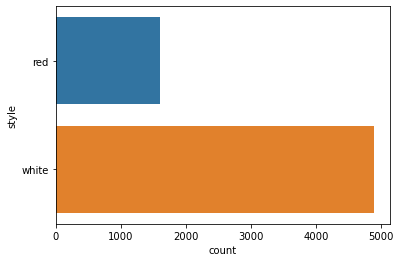

In [6]:
sns.countplot(y = df['style'])

# 3. Model Building

In [9]:
x = df.iloc[:,:-1]
y = df['style']

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [11]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f"Train: {dt.score(xtrain,ytrain)}")
print(f"Test: {dt.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 0.9995601495491533
Test: 0.9846153846153847
              precision    recall  f1-score   support

         red       0.97      0.97      0.97       502
       white       0.99      0.99      0.99      1448

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



In [12]:
# Accuracy=97
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
print(f"Train: {lg.score(xtrain,ytrain)}")
print(f"Test: {lg.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 0.9817462062898614
Test: 0.9748717948717949
              precision    recall  f1-score   support

         red       0.96      0.94      0.95       502
       white       0.98      0.99      0.98      1448

    accuracy                           0.97      1950
   macro avg       0.97      0.96      0.97      1950
weighted avg       0.97      0.97      0.97      1950



In [13]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
print(f"Train: {rfc.score(xtrain,ytrain)}")
print(f"Test: {rfc.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 0.9995601495491533
Test: 0.9948717948717949
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       502
       white       0.99      1.00      1.00      1448

    accuracy                           0.99      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



# Automating Model building

In [14]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,yp))

In [15]:
prediction(DecisionTreeClassifier())

Train Accuracy: 0.9995601495491533
Test Accuracy: 0.9871794871794872
              precision    recall  f1-score   support

         red       0.98      0.97      0.97       502
       white       0.99      0.99      0.99      1448

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950



In [14]:
prediction(LogisticRegression())

Train Accuracy: 0.9817462062898614
Test Accuracy: 0.9748717948717949
              precision    recall  f1-score   support

         red       0.96      0.94      0.95       502
       white       0.98      0.99      0.98      1448

    accuracy                           0.97      1950
   macro avg       0.97      0.96      0.97      1950
weighted avg       0.97      0.97      0.97      1950



In [16]:
prediction(RandomForestClassifier())

Train Accuracy: 0.9995601495491533
Test Accuracy: 0.9948717948717949
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       502
       white       0.99      1.00      1.00      1448

    accuracy                           0.99      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [15]:
prediction(GradientBoostingClassifier())

Train Accuracy: 0.9991202990983066
Test Accuracy: 0.9953846153846154
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       502
       white       0.99      1.00      1.00      1448

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



# Fine tuning Model: 

In [17]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [18]:
params = {
    'n_estimators' : [90,110,150],
    'learning_rate' : [0.1,0.3,0.7],
    'max_depth' : [2,4,6,8]
}

In [19]:
grid = GridSearchCV(GradientBoostingClassifier(), params, verbose=1)#verbose 

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.7],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [20]:
grid.best_params_

{'learning_rate': 0.7, 'max_depth': 4, 'n_estimators': 150}

In [24]:
prediction(GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=90))

Train Accuracy: 0.9962612711678029
Test Accuracy: 0.9928205128205129
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       502
       white       0.99      1.00      1.00      1448

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [25]:
prediction(XGBClassifier())

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['red' 'white']

In [ ]:
df['style'].unique()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
y

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: style, Length: 6497, dtype: object

In [28]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
prediction(XGBClassifier())

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['red' 'white']

In [31]:
ytrain

array([1, 1, 0, ..., 1, 1, 0])

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [32]:
ytrain

array([1, 1, 0, ..., 1, 1, 0])

In [33]:
prediction(XGBClassifier())

Train Accuracy: 0.9995601495491533
Test Accuracy: 0.9953846153846154
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       502
           1       0.99      1.00      1.00      1448

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



- **Perform hyperparameter tuning for XGB**
- Learning rate
- max_depth
- lambda 
- n estimators

# Stacking

In [21]:
models = []

models.append(('lg',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1', DecisionTreeClassifier(criterion='entropy')))

In [22]:
models

[('lg', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy'))]

In [23]:
prediction(StackingClassifier(estimators=models, final_estimator=RandomForestClassifier()))

Train Accuracy: 0.9918627666593358
Test Accuracy: 0.9861538461538462
              precision    recall  f1-score   support

         red       0.98      0.97      0.97       502
       white       0.99      0.99      0.99      1448

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950

